In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

ModuleNotFoundError: No module named 'lightgbm'

In [8]:
df = pd.read_csv("heart.csv")

## ---EDA---

In [9]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
### Check if there is missing datas ###

df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
### Rows and columns ###

df.shape

(918, 12)

In [37]:
df.info

<bound method DataFrame.info of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisea

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Hearth Disease

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

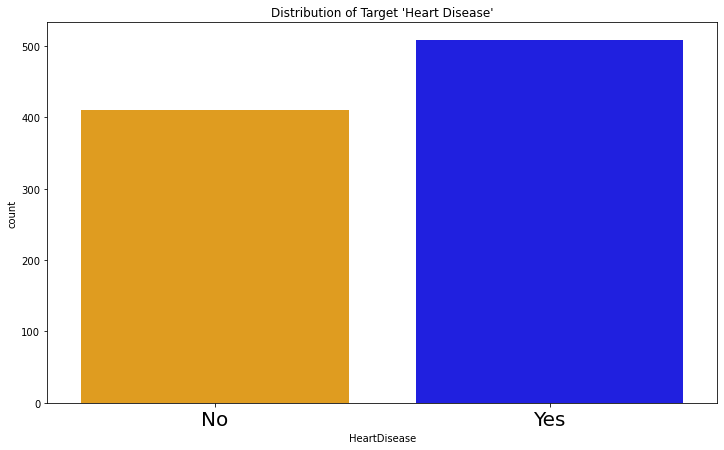

In [65]:
################
## Add LABELS ##
################
plt.figure(figsize=(12, 7))
heartDisease_countplot = sns.countplot(x=df.HeartDisease,palette=["orange","Blue"])
heartDisease_countplot.set_title("Distribution of Target 'Heart Disease'")
heartDisease_countplot.set_xticklabels(['No', 'Yes'], fontsize=20)

Text(0, 0.5, 'Count')

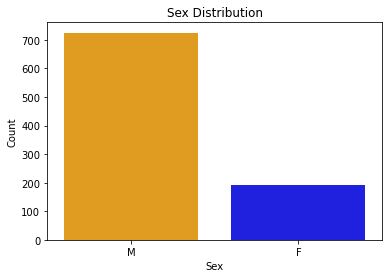

In [64]:
################
## Add LABELS ##
################
sns.countplot(data=df,x='Sex' , palette=['orange','Blue']);
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')

No handles with labels found to put in legend.


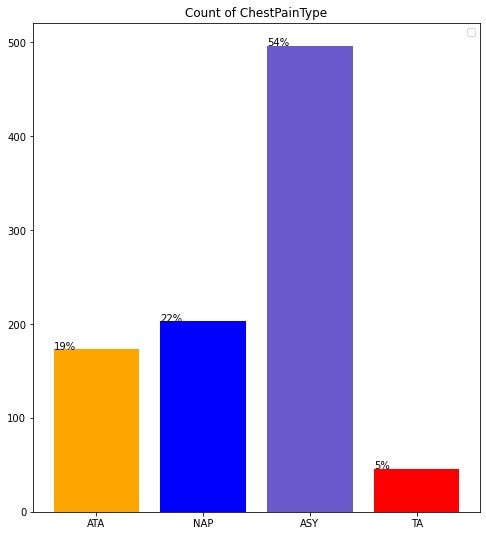

In [75]:
ChestPainType_label = ['ATA', 'NAP', 'ASY', 'TA']
ChestPainType_size = [173, 203, 496, 46]
ChestPainType_explode = (0, 0, 0, 0)

plt.figure(figsize=(8,9))
plt.bar(ChestPainType_label, ChestPainType_size, color=['orange', 'blue', 'slateblue','red'])
plt.title("Count of ChestPainType")
plt.legend()

ax = plt.gca()
n_points = df.shape[0]
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height/n_points), (x, y + height + 0.01))

### RestingECG

No handles with labels found to put in legend.


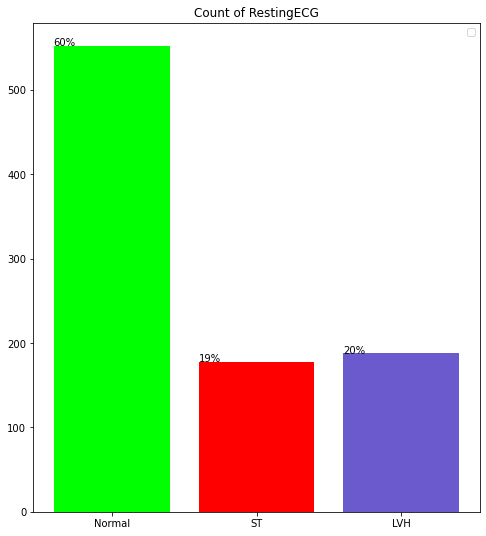

In [78]:

RestingECG_label = ['Normal', 'ST', 'LVH']
RestingECG_size = [552, 178, 188]
RestingECG_explode = (0, 0, 0)

plt.figure(figsize=(8,9))
plt.bar(RestingECG_label, RestingECG_size, color=['lime', 'red', 'slateblue'])
plt.title("Count of RestingECG")
plt.legend()


ax = plt.gca()
n_points = df.shape[0]
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height/n_points), (x, y + height + 0.01))

### ExeciseAngina

No handles with labels found to put in legend.


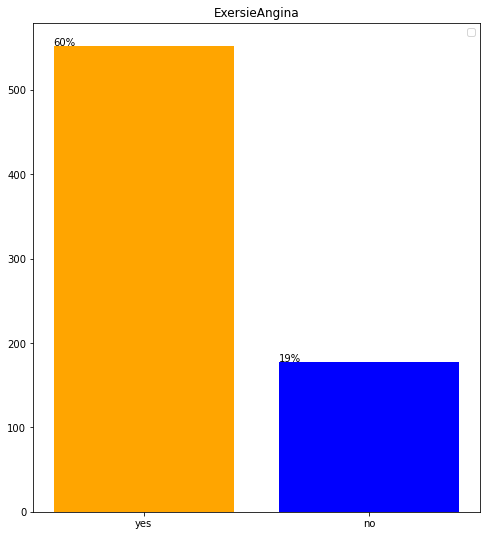

In [81]:
############################
#####gives wrong output ####
#############################


ExerciseAngina_label = ['yes', 'no']
ExerciseAngina_size = [552, 178]
ExerciseAngina_explode = (0, 0)

plt.figure(figsize=(8,9))
plt.bar(ExerciseAngina_label, ExerciseAngina_size, color=['orange', 'blue'])
plt.title("ExersieAngina")
plt.legend()

# Add percentages to the bars
ax = plt.gca()
n_points = df.shape[0]
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height/n_points), (x, y + height + 0.01))

### ST_Slopea

No handles with labels found to put in legend.


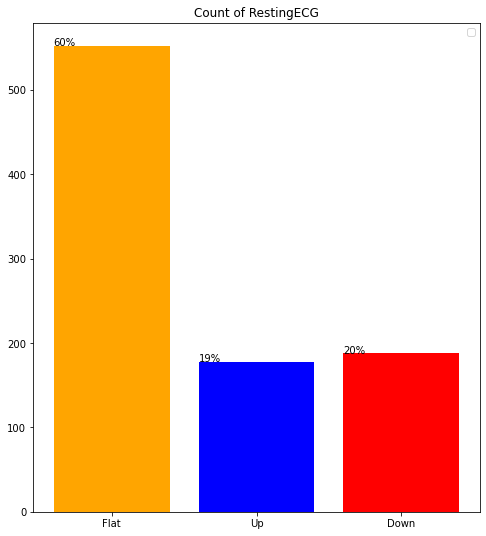

In [79]:
ST_Slope_label = ['Flat','Up','Down']
ST_Slope_size = [552, 178, 188]
ST_Slope_explode = (0, 0, 0)

plt.figure(figsize=(8,9))
plt.bar(ST_Slope_label, ST_Slope_size, color=['orange', 'blue', 'red'])
plt.title("Count of RestingECG")
plt.legend()

# Add percentages to the bars
ax = plt.gca()
n_points = df.shape[0]
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height/n_points), (x, y + height + 0.01))


In [14]:
Categorical = df.select_dtypes(include=['object'])
Numerical = df.select_dtypes(include=['int64', 'float64'])

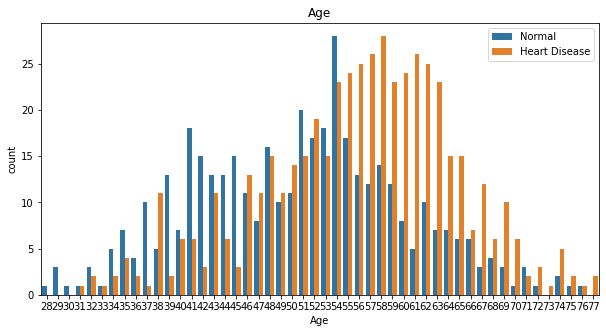

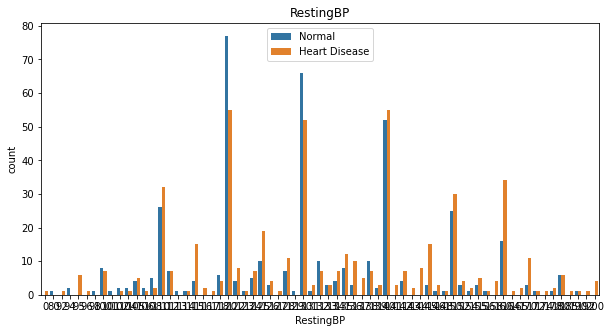

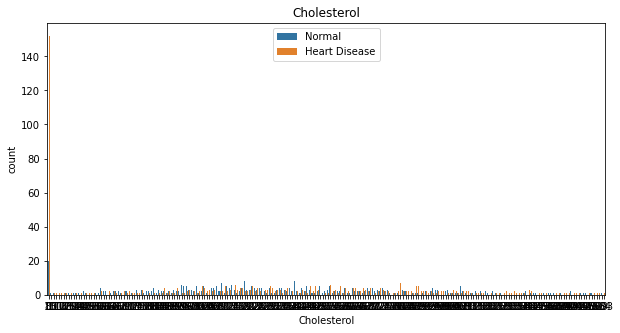

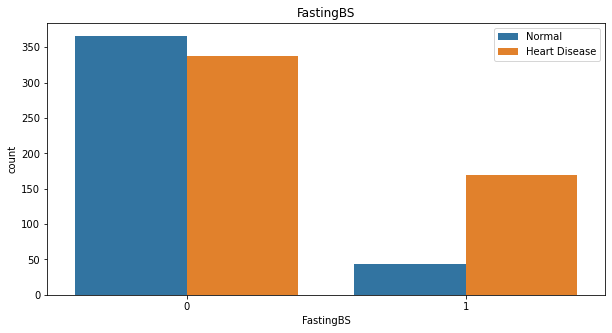

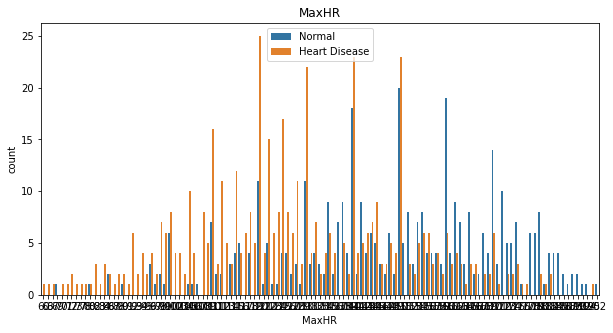

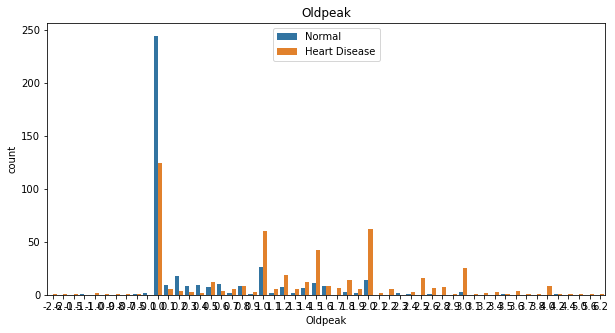

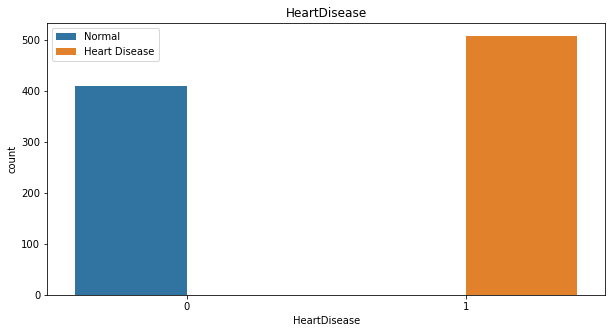

In [15]:
# ploting numerical features with target
#here we compare betwwen our target and our numerical features 
for i in Numerical:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i, data=df, hue='HeartDisease')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

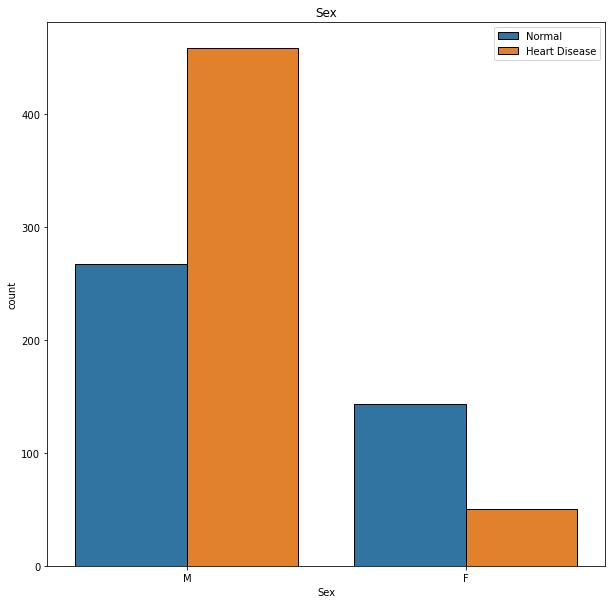

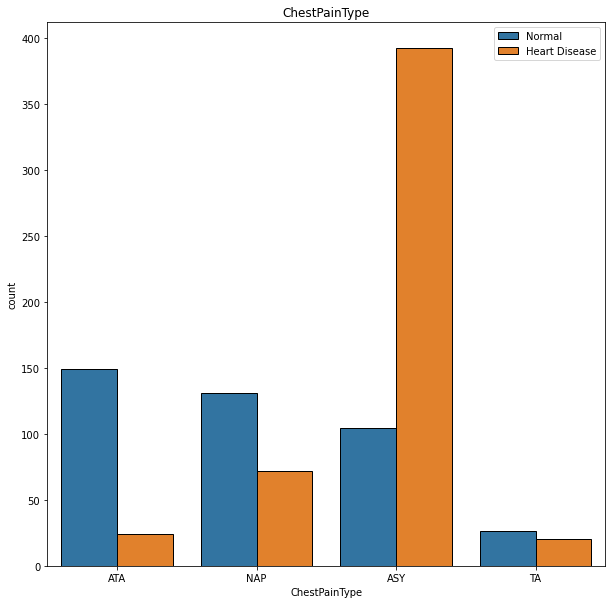

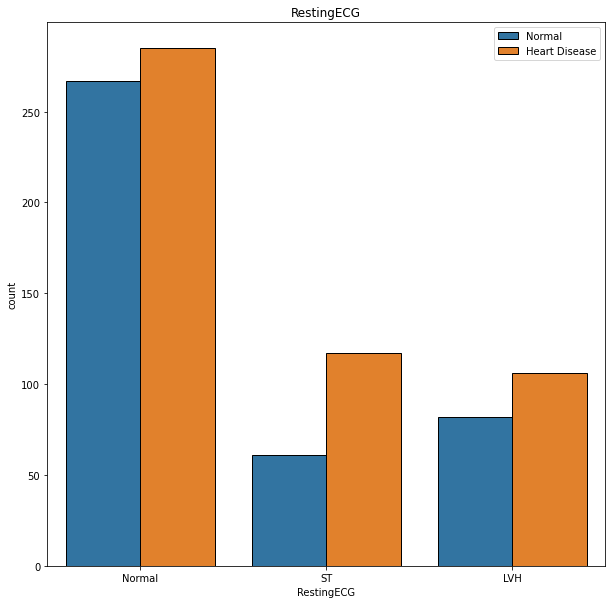

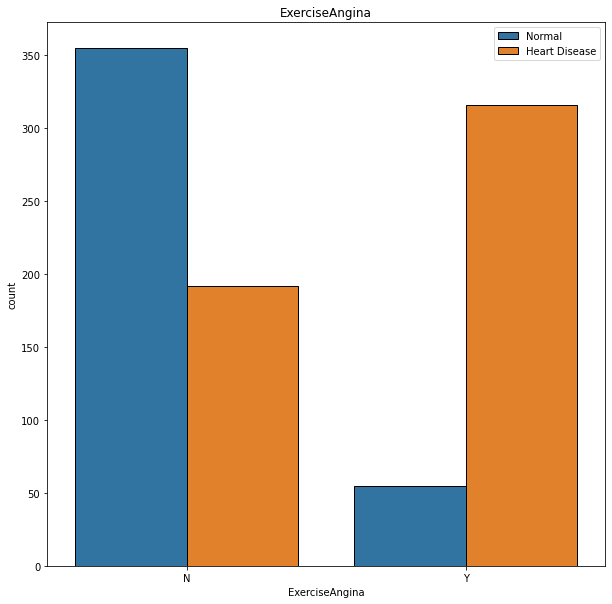

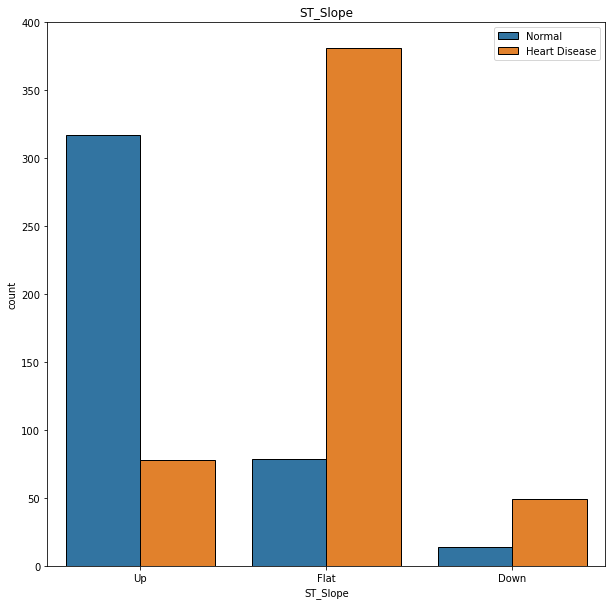

In [16]:
#here we compare betwwen our target and our Categorical features 
for i in Categorical:
    plt.figure(figsize=(10,10))
    sns.countplot(x=i, data=df, hue='HeartDisease', edgecolor='black')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

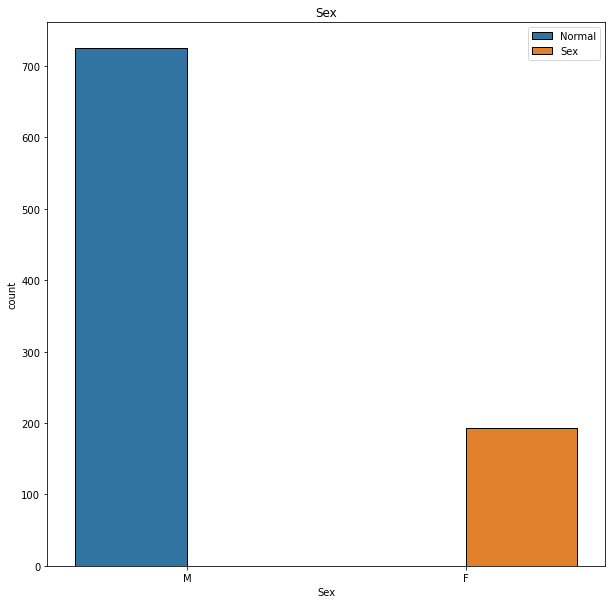

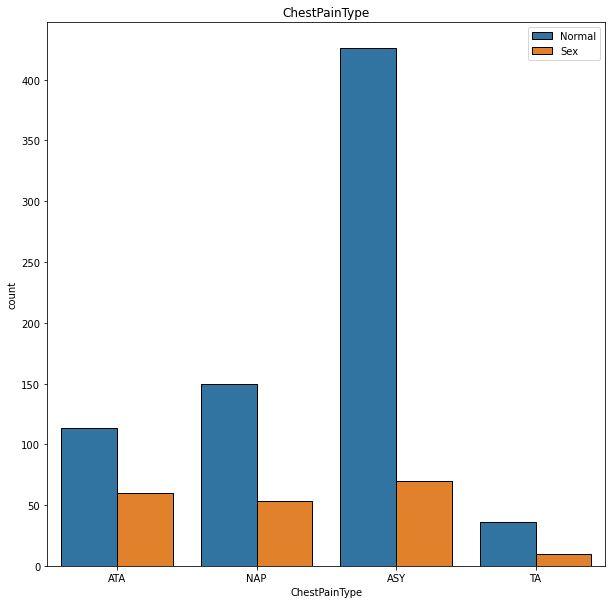

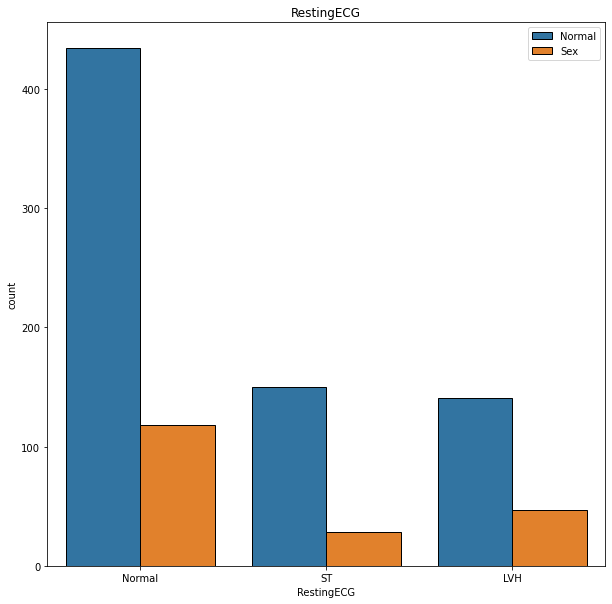

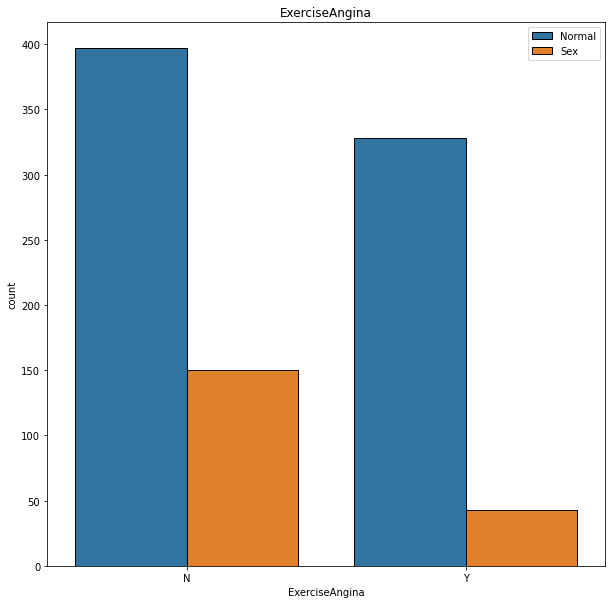

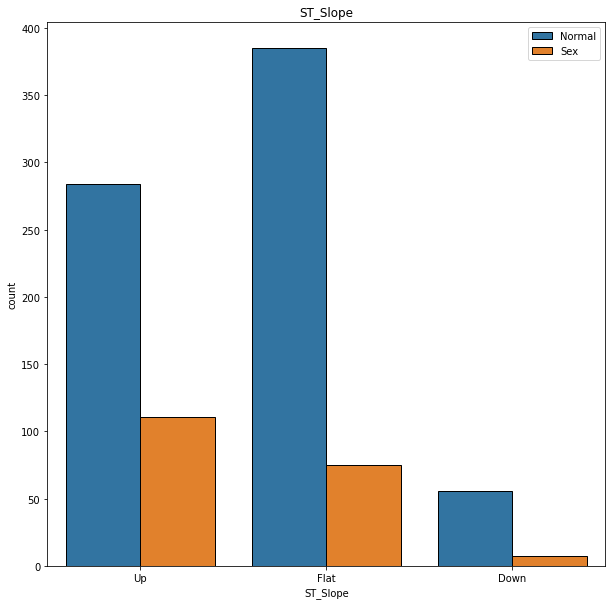

In [18]:
#here we compare betwwen our target and our Categorical features 
for i in Categorical:
    plt.figure(figsize=(10,10))
    sns.countplot(x=i, data=df, hue='Sex', edgecolor='black')
    plt.legend(['Normal', 'Sex'])
    plt.title(i)
    plt.show()